In [1]:
import os
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly
import BDACL
import sys
print(sys.version)
from BDACL import BDACLModel
from BDACL.utils import print_dataset_information
#### IMPORT LIBRARY ####
import scanpy as sc
import ED
import copy
ncluster=4
data_dir="E:/研究生记录/代码/BDACL/tutorial_data/Luecken_sim2/sim2_norm.h5ad"
folder_path = 'E://研究生记录//结果//sim2'
os.chdir(folder_path)
adata_raw=sc.read(data_dir)
adata_raw


3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]
3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]


AnnData object with n_obs × n_vars = 19318 × 10000
    obs: 'Cell', 'Batch', 'Group', 'ExpLibSize', 'SubBatch', 'Sub', 'sum', 'detected', 'percent_top_50', 'percent_top_100', 'percent_top_200', 'percent_top_500', 'total', 'Discard', 'size_factors'
    var: 'Gene', 'BaseGeneMean', 'OutlierFactor', 'GeneMean', 'BatchFacBatch1', 'BatchFacBatch2', 'BatchFacBatch3', 'BatchFacBatch4', 'DEFacGroup1', 'DEFacGroup2', 'DEFacGroup3', 'DEFacGroup4', 'mean', 'detected'
    layers: 'counts'

AnnData object with n_obs × n_vars = 19318 × 10000
    obs: 'Cell', 'BATCH', 'celltype', 'ExpLibSize', 'SubBatch', 'Sub', 'sum', 'detected', 'percent_top_50', 'percent_top_100', 'percent_top_200', 'percent_top_500', 'total', 'Discard', 'size_factors'
    var: 'Gene', 'BaseGeneMean', 'OutlierFactor', 'GeneMean', 'BatchFacBatch1', 'BatchFacBatch2', 'BatchFacBatch3', 'BatchFacBatch4', 'DEFacGroup1', 'DEFacGroup2', 'DEFacGroup3', 'DEFacGroup4', 'mean', 'detected'
    layers: 'counts'
===========print brief infomation of dataset ===============
===========there are 4 batchs in this dataset==============
===========there are 4 celltypes with this dataset=========


celltype  Group1  Group2  Group3  Group4  Total
BATCH                                          
Batch1      1682    1058    1212     854   4806
Batch2      1198    1921    1303     483   4905
Batch3      1446     726    1673     964   4809
Batch4       481    1447     953    1917   4798
Total       4807    5152    5141    4218  19318

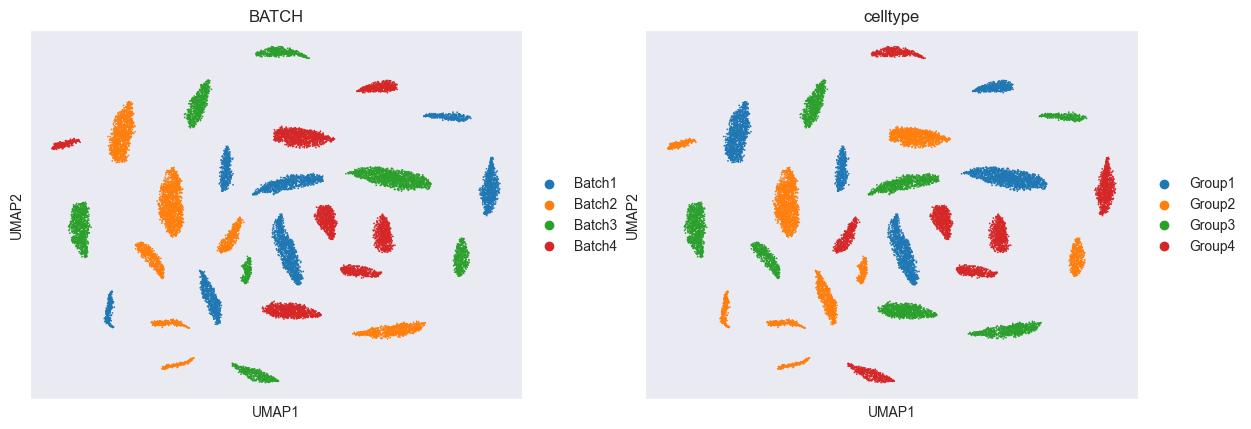

In [3]:
adata_raw.obs.rename(columns={"Batch": "BATCH", "Group": "celltype"}, inplace=True)
print(adata_raw)

print_dataset_information(adata_raw,batch_key="BATCH",celltype_key="celltype")
adata_copy = copy.deepcopy(adata_raw)
sc.pp.normalize_total(adata_copy,target_sum=1e4)
sc.pp.log1p(adata_copy)
sc.pp.highly_variable_genes(adata_copy,n_top_genes=3000,subset=True)
sc.pp.scale(adata_copy)
sc.tl.pca(adata_copy)
sc.pp.neighbors(adata_copy)
sc.tl.umap(adata_copy)
sc.pl.umap(adata_copy,color=["BATCH","celltype"])
adata_copy = copy.deepcopy(adata_raw)

In [4]:
adata__raw = ED.stage1.data_preprocess(adata_copy, 'BATCH')

Establishing Adata for Next Step...
PreProcess Done.


In [5]:
EC, adata__raw = ED.stage1.BDACL_fast(adata__raw, key="BATCH",n_epochs=50)

Step 1: Calibrating Celltype...
[Epoch 1/50] [Reconstruction loss: 0.054240]
[Epoch 2/50] [Reconstruction loss: 0.053549]
[Epoch 3/50] [Reconstruction loss: 0.051811]
[Epoch 4/50] [Reconstruction loss: 0.055154]
[Epoch 5/50] [Reconstruction loss: 0.046483]
[Epoch 6/50] [Reconstruction loss: 0.044727]
[Epoch 7/50] [Reconstruction loss: 0.042598]
[Epoch 8/50] [Reconstruction loss: 0.042627]
[Epoch 9/50] [Reconstruction loss: 0.042119]
[Epoch 10/50] [Reconstruction loss: 0.042285]
[Epoch 11/50] [Reconstruction loss: 0.041633]
[Epoch 12/50] [Reconstruction loss: 0.040664]
[Epoch 13/50] [Reconstruction loss: 0.040038]
[Epoch 14/50] [Reconstruction loss: 0.039497]
[Epoch 15/50] [Reconstruction loss: 0.039578]
[Epoch 16/50] [Reconstruction loss: 0.039338]
[Epoch 17/50] [Reconstruction loss: 0.038729]
[Epoch 18/50] [Reconstruction loss: 0.038418]
[Epoch 19/50] [Reconstruction loss: 0.038720]
[Epoch 20/50] [Reconstruction loss: 0.038948]
[Epoch 21/50] [Reconstruction loss: 0.039120]
[Epoch 22/5

... storing 'BATCH' as categorical


[<Axes: title={'center': 'BATCH'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'celltype'}, xlabel='UMAP1', ylabel='UMAP2'>]

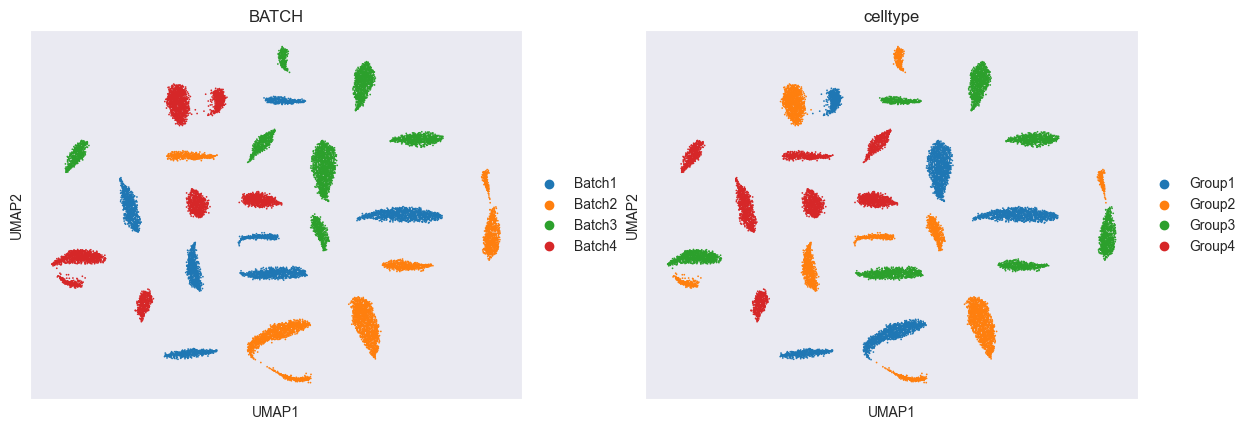

In [6]:
adata_raw_copy=adata__raw.copy()
sc.pp.normalize_total(adata_raw_copy,target_sum=1e4)
sc.pp.log1p(adata_raw_copy)
sc.pp.highly_variable_genes(adata_raw_copy,n_top_genes=2000,subset=True)
sc.pp.scale(adata_raw_copy)
sc.tl.pca(adata_raw_copy)
sc.pp.neighbors(adata_raw_copy)
sc.tl.umap(adata_raw_copy)
sc.pl.umap(adata_raw_copy,color=["BATCH","celltype"],show=False)

# Create BDACLModel object

In [7]:
dataset="newbact"
BDACL=BDACLModel(save_dir="./result/"+dataset+"/",verbose=True)

2024-06-18 14:13:04,672 - root - INFO - 创建日志文件...
2024-06-18 14:13:04,689 - root - INFO - 创建 Model 对象完成...


# BDACL preprocessing

In [8]:
adata=BDACL.preprocess(adata_raw,cluster_method="louvain",resolution=3.0,n_high_var=1000)
print(adata)

2024-06-18 14:13:08,008 - root - INFO - 正在执行 preprocess() 函数...
2024-06-18 14:13:08,010 - root - INFO - 模式=unsupervised
2024-06-18 14:13:08,012 - root - INFO - 聚类方法=louvain
2024-06-18 14:13:08,044 - root - INFO - 分辨率=3.0
2024-06-18 14:13:08,045 - root - INFO - 批次键=BATCH
2024-06-18 14:13:08,046 - root - INFO - Normalize counts per cell(sum=10000.0)
2024-06-18 14:13:09,406 - root - INFO - Log1p data
2024-06-18 14:13:10,831 - root - INFO - Select HVG(n_top_genes=1000)
2024-06-18 14:13:26,781 - root - INFO - Scale batch(scale_value=10.0)
2024-06-18 14:13:29,537 - root - INFO - Calculate PCA(n_comps=100)


         Falling back to preprocessing with `sc.pp.pca` and default params.


2024-06-18 14:13:41,976 - root - INFO - Apply louvain clustring(resolution=3.0) initization
2024-06-18 14:13:41,979 - root - INFO - Number of Cluster =29
2024-06-18 14:13:41,982 - root - INFO - clusters=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
2024-06-18 14:13:41,987 - root - INFO - 预处理数据集完成。


AnnData object with n_obs × n_vars = 19318 × 1000
    obs: 'Cell', 'BATCH', 'celltype', 'ExpLibSize', 'SubBatch', 'Sub', 'sum', 'detected', 'percent_top_50', 'percent_top_100', 'percent_top_200', 'percent_top_500', 'total', 'Discard', 'size_factors', 'batch', 'init_cluster'
    var: 'Gene', 'BaseGeneMean', 'OutlierFactor', 'GeneMean', 'BatchFacBatch1', 'BatchFacBatch2', 'BatchFacBatch3', 'BatchFacBatch4', 'DEFacGroup1', 'DEFacGroup2', 'DEFacGroup3', 'DEFacGroup4', 'detected', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'mean-3', 'std-3'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'


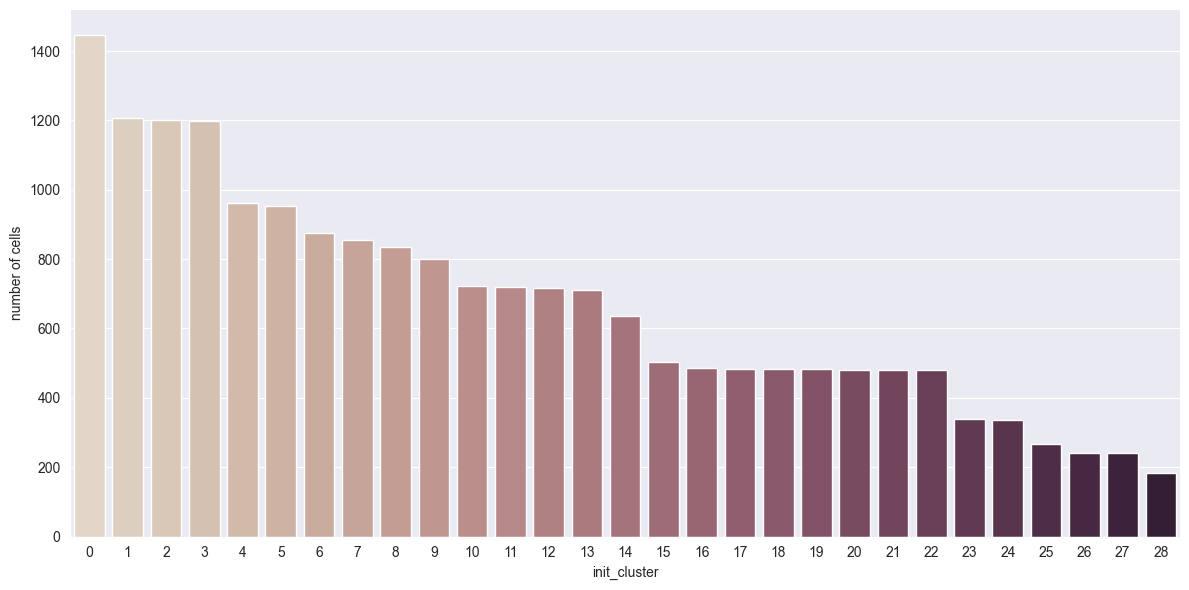

In [10]:
ax=sns.catplot(x="init_cluster", kind="count", palette="ch:.25",data=adata.obs,height=6,aspect=2)
ax.set(ylabel='number of cells')
plt.show()

... storing 'BATCH' as categorical
... storing 'SubBatch' as categorical


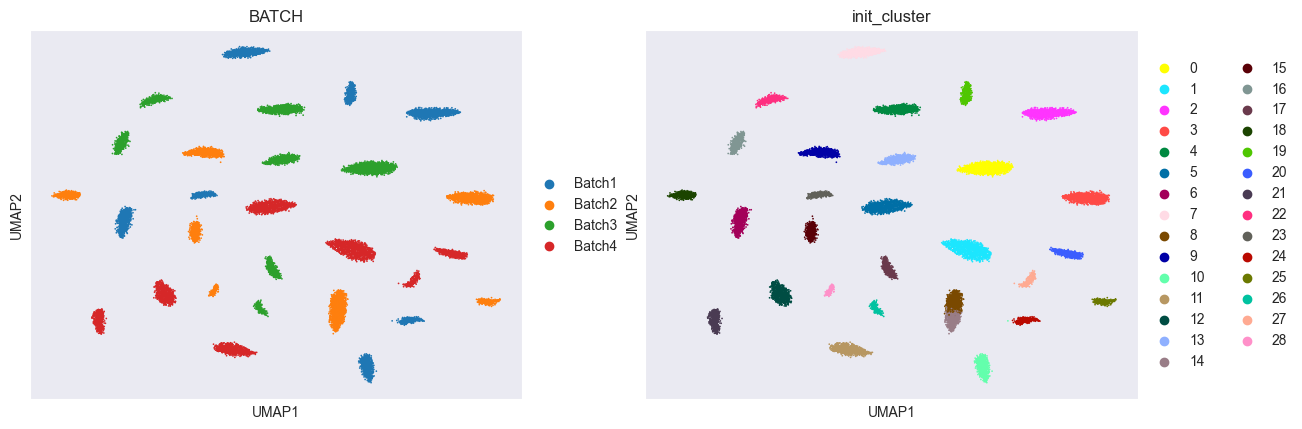

In [11]:
# visluzation of preprocessed adata
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata,color=["BATCH","init_cluster"])

2024-06-18 14:15:08,162 - root - INFO - K_in=5, K_bw=10
2024-06-18 14:15:08,164 - root - INFO - 开始计算 KNN 和 MNN 以获取簇之间的相似性。
2024-06-18 14:15:08,166 - root - INFO - 使用近似方法计算每个批次内的 KNN 对...
2024-06-18 14:15:08,179 - root - INFO - Calculate KNN pair intra batch...........
2024-06-18 14:15:08,181 - root - INFO - K=5
2024-06-18 14:15:08,182 - root - INFO - metric=cosine
2024-06-18 14:15:08,183 - root - INFO - Processing datasets: (0, 0) = ('Batch1', 'Batch1')
2024-06-18 14:15:08,886 - root - INFO - There are (34544) KNN pairs when processing (0, 0)=('Batch1', 'Batch1')
2024-06-18 14:15:08,887 - root - INFO - Processing datasets: (1, 1) = ('Batch2', 'Batch2')
2024-06-18 14:15:09,405 - root - INFO - There are (35312) KNN pairs when processing (1, 1)=('Batch2', 'Batch2')
2024-06-18 14:15:09,407 - root - INFO - Processing datasets: (2, 2) = ('Batch3', 'Batch3')
2024-06-18 14:15:09,896 - root - INFO - There are (34654) KNN pairs when processing (2, 2)=('Batch3', 'Batch3')
2024-06-18 14:15:09,898 

<Figure size 1500x1000 with 0 Axes>

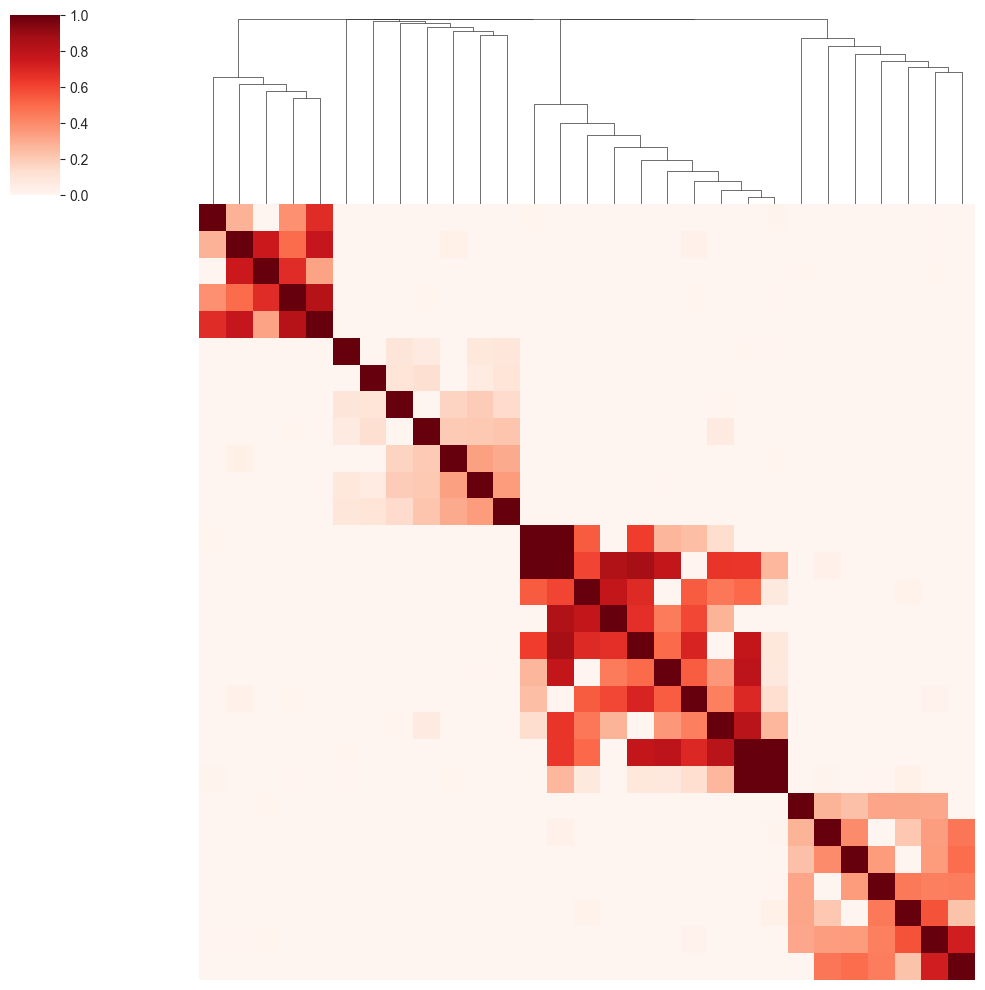

In [12]:
from BDACL.utils import plotDendrogram, plotHeatMap

BDACL.convertInput(adata, batch_key="BATCH")
_, _, cor, _ = BDACL.calculate_similarity()
fig = plt.figure(figsize=(15, 10))
Z = plotDendrogram(BDACL.cor_matrix.copy(), BDACL.nn_matrix.copy(),
                   BDACL.merge_df["init_cluster"].value_counts().values.copy())
hf = plotHeatMap(BDACL.cor_matrix.copy(), Z)
plt.savefig('xiangsidu.svg', format='svg', bbox_inches='tight')
plt.show()

In [13]:
from BDACL.utils import plotSankey

ncluster_list=[20,15,10,6,4]# for example
merge_df=BDACL.merge_cluster(ncluster_list=ncluster_list,merge_rule="rule2")
merge_df["celltype"]=adata.obs["celltype"].values

cols=["init_cluster"]+[str(i) for i in ncluster_list]+["celltype"]
fig=plotSankey(merge_df,cat_cols=cols,value_cols='value',title="Sanky plot")
output_file = "sankey_plot.svg"
fig.write_image(output_file)
plotly.offline.iplot(fig)

2024-06-18 14:15:37,200 - root - INFO - BDACL merge cluster with rule2....
2024-06-18 14:15:37,204 - root - INFO - merge_rule2....
2024-06-18 14:15:37,432 - root - INFO - merging cluster set:[{0}, {2}, {3}, {4}, {5}, {6}, {7}, {9}, {11}, {12}, {13}, {15}, {16}, {18}, {19}, {20}, {21}, {22}, {23}, {1, 8, 10, 14, 17, 24, 25, 26, 27, 28}]
2024-06-18 14:15:37,435 - root - INFO - merge_rule2....
2024-06-18 14:15:37,691 - root - INFO - merging cluster set:[{4}, {6}, {7}, {9}, {11}, {12}, {13}, {16}, {18}, {21}, {22}, {23}, {1, 8, 10, 14, 17, 24, 25, 26, 27, 28}, {0, 2, 3, 19, 20}, {5, 15}]
2024-06-18 14:15:37,694 - root - INFO - merge_rule2....
2024-06-18 14:15:37,960 - root - INFO - merging cluster set:[{7}, {11}, {12}, {16}, {18}, {21}, {22}, {1, 8, 10, 14, 17, 24, 25, 26, 27, 28}, {0, 2, 3, 19, 20}, {4, 5, 6, 9, 13, 15, 23}]
2024-06-18 14:15:37,962 - root - INFO - merge_rule2....
2024-06-18 14:15:38,303 - root - INFO - merging cluster set:[{11}, {12}, {1, 8, 10, 14, 17, 24, 25, 26, 27, 28

In [14]:
BDACL.build_net()

2024-06-18 14:17:12,753 - root - INFO - 为BDACL培训构建嵌入网络
2024-06-18 14:17:12,765 - root - INFO - EmbeddingNet(
  (actn): ReLU()
  (fc): Sequential(
    (0): Linear(in_features=1000, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=32, bias=True)
  )
)
2024-06-18 14:17:12,767 - root - INFO - 构建嵌入网络完成…


2024-06-18 14:17:18,372 - root - INFO - expect_num_cluster为None，使用特征值差距来估计细胞类型......的数量 


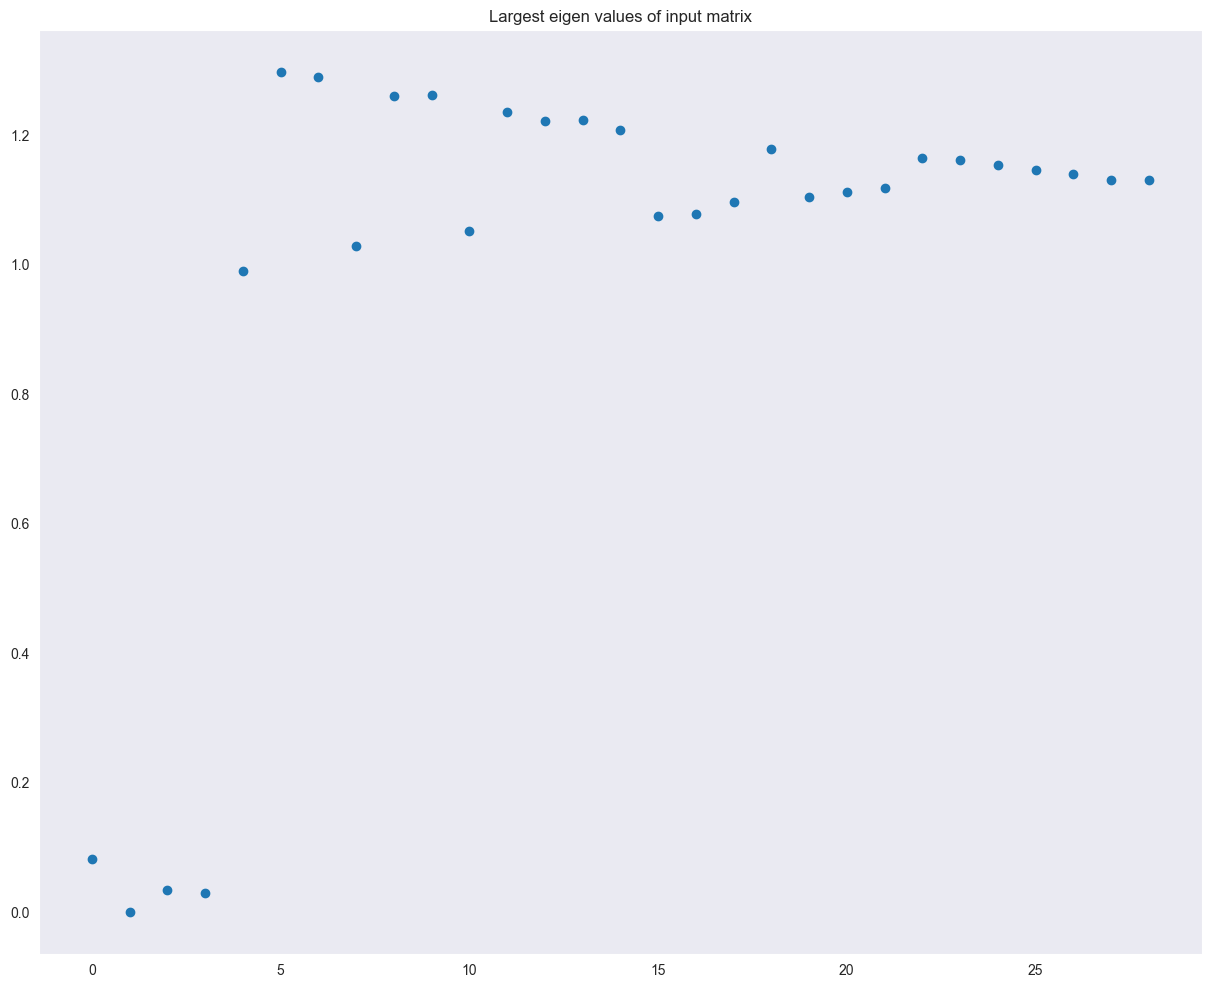

2024-06-18 14:17:19,019 - root - INFO - 最优簇数是 [ 4  5  8 11 18]
2024-06-18 14:17:19,021 - root - INFO - train BDACL(expect_num_cluster=4) with Embedding Net
2024-06-18 14:17:19,022 - root - INFO - expect_num_cluster=4
2024-06-18 14:17:19,091 - root - INFO - 利用CPU训练模型
2024-06-18 14:17:19,204 - root - INFO - not use earlystopping!!!!
2024-06-18 14:17:23,675 - root - INFO - epoch=1,loss=229.47
2024-06-18 14:17:25,456 - root - INFO - epoch=2,loss=3.76
2024-06-18 14:17:27,164 - root - INFO - epoch=3,loss=2.59
2024-06-18 14:17:29,018 - root - INFO - epoch=4,loss=1.22
2024-06-18 14:17:30,615 - root - INFO - epoch=5,loss=1.39
2024-06-18 14:17:32,241 - root - INFO - epoch=6,loss=0.32
2024-06-18 14:17:33,862 - root - INFO - epoch=7,loss=1.24
2024-06-18 14:17:35,483 - root - INFO - epoch=8,loss=0.84
2024-06-18 14:17:37,113 - root - INFO - epoch=9,loss=0.16
2024-06-18 14:17:38,683 - root - INFO - epoch=10,loss=0.1
2024-06-18 14:17:40,295 - root - INFO - epoch=11,loss=0.24
2024-06-18 14:17:41,872 - 

In [15]:
if os.path.isfile(os.path.join(BDACL.save_dir,"scDML_model.pkl")):
    os.remove(os.path.join(BDACL.save_dir,"scDML_model.pkl"))
features=BDACL.train(expect_num_cluster=None,num_epochs=100)
adata.obsm["X_emb"]=features
adata.obs["reassign_cluster"]=BDACL.train_label.astype(int).astype(str)
adata.obs["reassign_cluster"]=adata.obs["reassign_cluster"].astype("category")

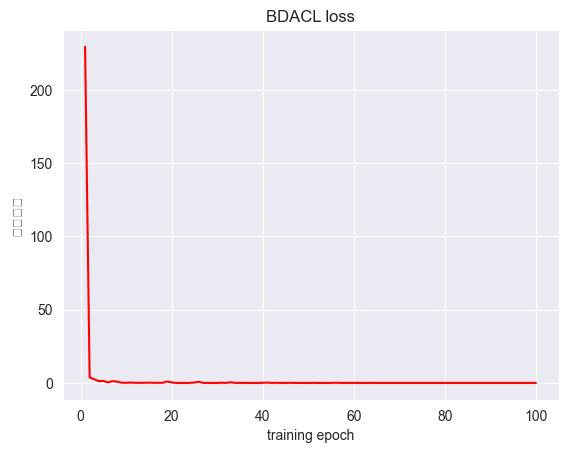

In [16]:
fig=plt.figure()
plt.title("BDACL loss")
plt.plot(range(1,len(BDACL.loss)+1),BDACL.loss,c="r")
plt.xlabel("training epoch")
plt.ylabel("训练损失")
plt.show()

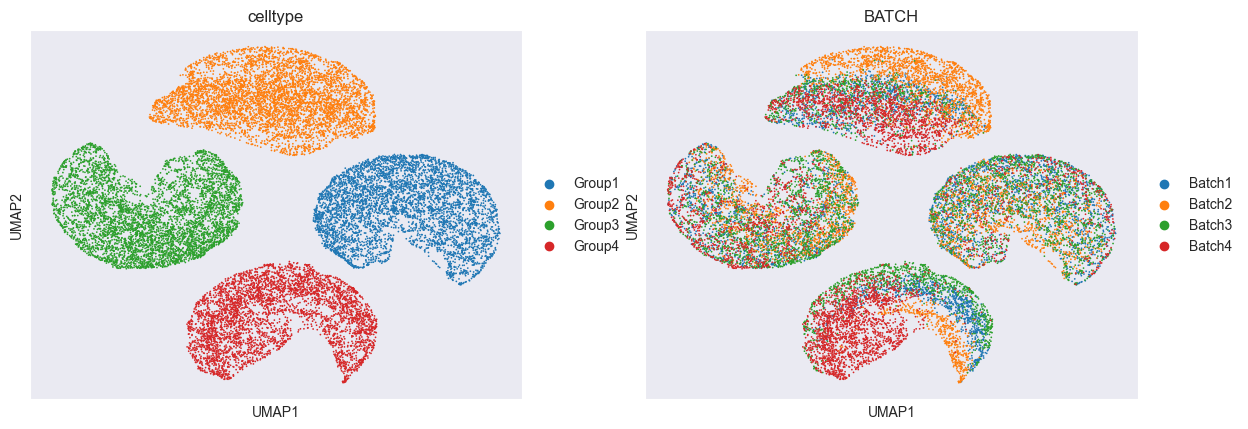

<Figure size 640x480 with 0 Axes>

In [17]:
sc.pp.neighbors(adata,use_rep="X_emb",random_state=0)
sc.tl.umap(adata)

sc.pl.umap(adata,color=["celltype","BATCH"])

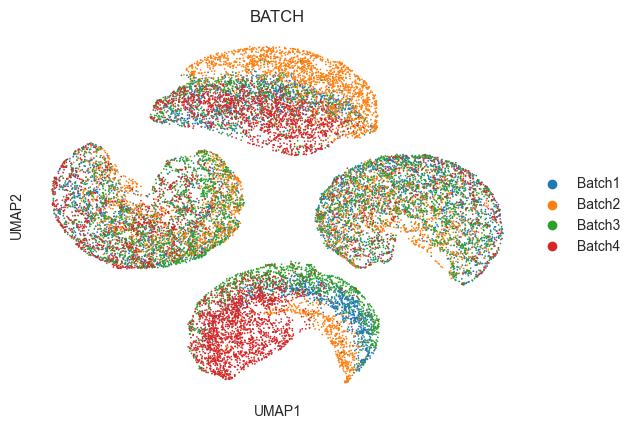

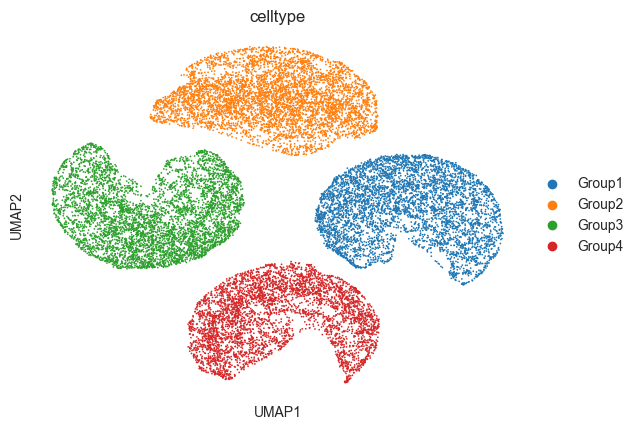

In [18]:
import os
folder_path = 'E:/研究生记录/结果/sim2'
os.chdir(folder_path)
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
sc.pl.umap(adata, color=['BATCH'], save='BATCH.svg')
sc.pl.umap(adata, color=['celltype'], save='celltype.svg')

In [19]:
from sklearn.metrics.cluster import adjusted_rand_score,normalized_mutual_info_score
ari=adjusted_rand_score(adata.obs["reassign_cluster"],adata.obs["celltype"])
nmi=normalized_mutual_info_score(adata.obs["reassign_cluster"],adata.obs["celltype"])
print("ARI={}".format(ari))
print("NMI={}".format(nmi))

ARI=1.0
NMI=1.0


In [ ]:
#